### Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns

### Read the data as a data frame

In [2]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### EDA - shape & type of Data

In [3]:
data.shape

(1338, 7)

In [4]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### EDA - Checking the presence of missing values

In [5]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### EDA - 5 point summary of numerical attributes

In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### EDA - Distribution of ‘bmi’, ‘age’ and ‘charges’ columns	

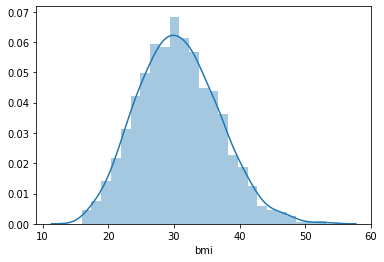

In [7]:
#data['age'].plot(kind='barh')
sns.distplot(data['bmi'])

The plot is a uniform distribution of values in the ‘bmi’ feature. Thus, the feature is perfectly formatted with mean and median values close to each other.

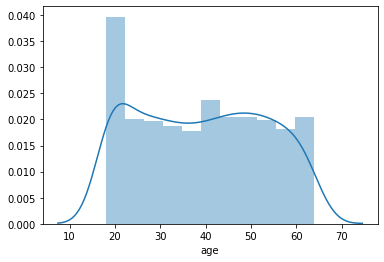

In [8]:
sns.distplot(data['age'])

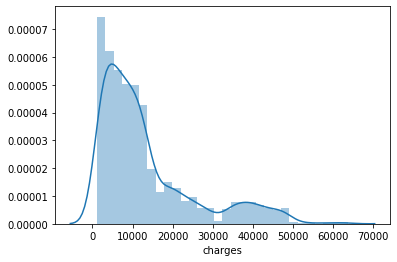

In [9]:
sns.distplot(data['charges'])

These two features are non-uniform in distribution and so are not expected to perform the best in a machine learning model. The mean and median values are values apart. As you can see the ‘charges’ plot is right-skewed (long tail on the right) it has its mean greater than its median.

### EDA - Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns	

In [10]:
from scipy.stats import skew

print("Skewness of BMI",skew(data['bmi']))
print("Skewness of Age",skew(data['age']))
print("Skewness of Charges",skew(data['charges']))

Skewness of BMI 0.28372857291709386
Skewness of Age 0.055610083072599126
Skewness of Charges 1.5141797118745743


There is positive skewnewss for all columns and tail is towards right side

### EDA - Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns	

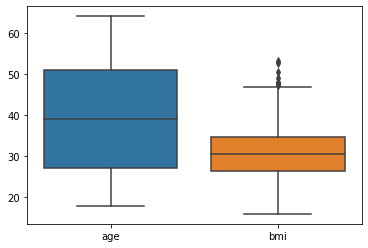

In [11]:
sns.boxplot(data=data[['age','bmi']])

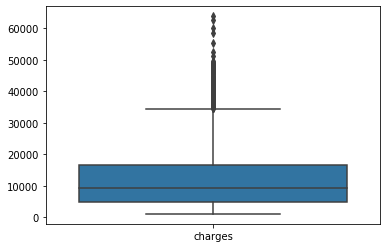

In [12]:
sns.boxplot(data=data[['charges']])

##### There are many outlier presence in charges columns

### EDA - Distribution of categorical columns

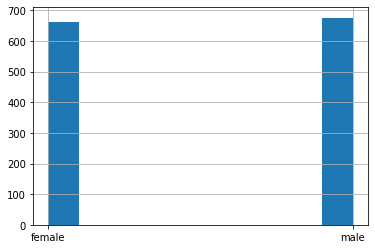

In [13]:
data['sex'].hist()

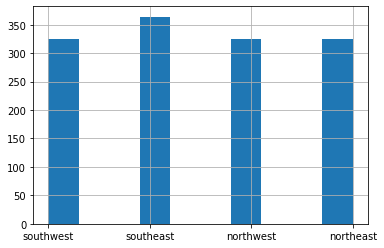

In [14]:
data['region'].hist()

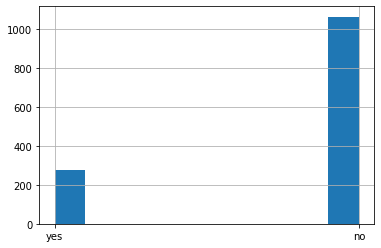

In [15]:
data['smoker'].hist()

### EDA - Pair plot that includes all the columns of the data frame	

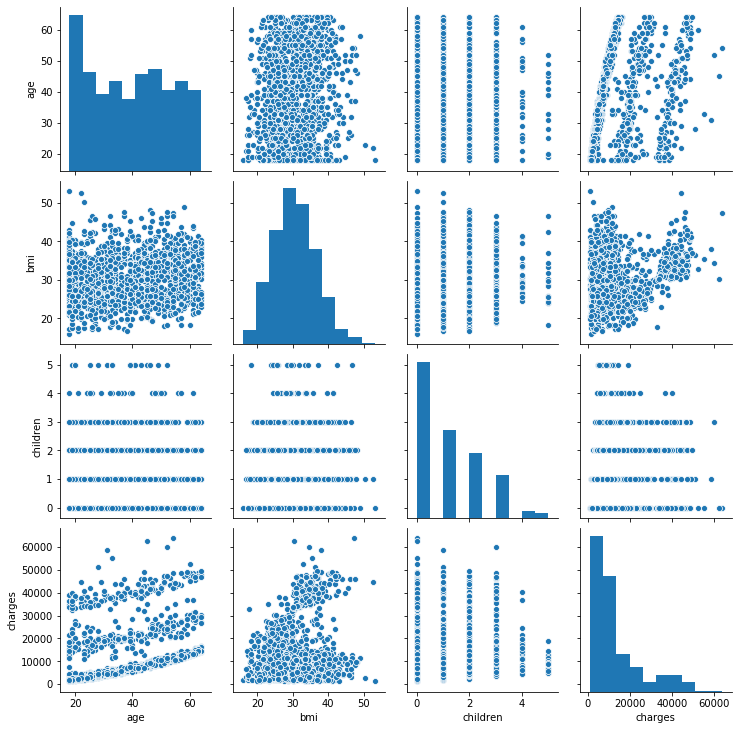

In [16]:
sns.pairplot(data)

<p>As there are only 4 attributes numeric in nature (int or float), the rest of them are not included in the pair plot. The diagonal plots represent distribution of the variable relative to itself.</p> <p>The plot between ‘age’ and ‘bmi’ does not indicate any relationship between them. The plot is more like a cloud and lacks direction.</p> <p>Between ‘age’ and ‘charges’, there is no clear relationship, though there seem to be 3 lines of positive relationship between them. It means, there are 3 sets of charges which increase gradually with age.</p> <p>No clear relation between ‘age’ and ‘children’ either.</p> <p>The range of ‘bmi’ decreases as children increases, however there are some extreme values in ‘bmi’ for children value 5.</p><p> There is a little positive relation between ‘bmi’ and ‘charges’, although the plot is a cloud on initial values of ‘charges’.</p> <p>The range of ‘charges’ decreases as the value of ‘children’ increases.</p>

### Do charges of people who smoke differ significantly from the people who don't?

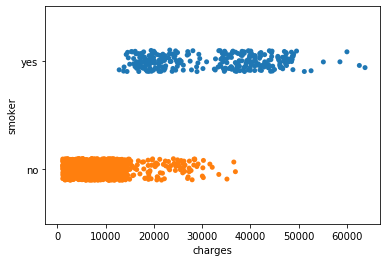

In [17]:
sns.stripplot(data['charges'], data['smoker'])

There are people who smoke and there are people who do not smoke, but at the same time there are different charges for smokers and different charges for non smokers. People who smoke have high charges and the people who do not smoke have considerably very low charges. So, charges do differ for people who smoke from the people who do not smoke but not significantly as there is some intersection of values for both types of people.

### Does bmi of males differ significantly from that of females	

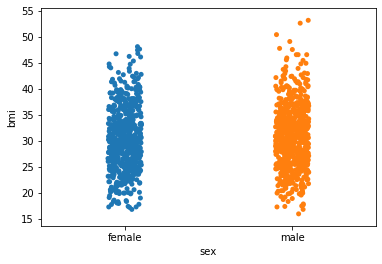

In [18]:
sns.stripplot(data['sex'], data['bmi'])

There is no significant difference in BMI for male and female genders, so no relationship exists between the two

### Is the proportion of smokers significantly different in different genders	

In [19]:
total_smoker = data[ data['smoker'] =="yes"].shape[0]
total_male_smoker = data[ data['smoker']=="yes"] [data['sex']=="male"].shape[0] 
total_female_smoker = data[ data['smoker']=="yes"] [data['sex']=="female"].shape[0]
propotion_male_smoker = total_male_smoker / total_smoker
propotion_female_smoker = total_female_smoker / total_smoker


print("Total Smoker",total_smoker)
print("Total Male Smoker",total_male_smoker)
print("Total Female Smoker",total_female_smoker)
print("Proption Male Smoker",propotion_male_smoker)
print("Proption Female Smoker",propotion_female_smoker)

Total Smoker 274
Total Male Smoker 159
Total Female Smoker 115
Proption Male Smoker 0.5802919708029197
Proption Female Smoker 0.4197080291970803


/Users/jigar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/jigar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


The proportions being 58% and 42% for male and female genders who smoke are not significantly different.

### Is the distribution of bmi across women with no children, one child and two children, the same	

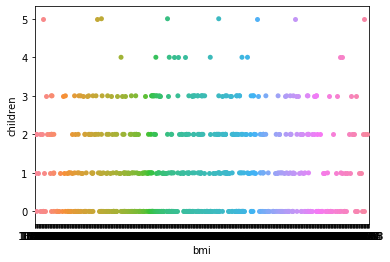

In [20]:
sns.stripplot(data['bmi'], data[data['sex']=='female']['children'])

Yes, the distributions of ‘bmi’ are nearly same across women with 0, 1 or 2 children.